In [1]:
#importing important libraries

import cv2
import time
import imutils
from skimage.metrics import  structural_similarity
import numpy as np

# loading the two images
img1=cv2.imread('img1.png')
img2=cv2.imread('img2.png')


gray1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY) #'.cvtClor()':converts B-G-R color of img1 to gray color

gray2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY) #'.cvtClor()':converts B-G-R color of img2 to gray color



(score, diff)= structural_similarity(gray1, gray2, full=True)
#looking for the structural similarity between 'gray1' and 'gray2'.

score=score*100 #to convert the SSIM into %

# structural_similarity will look for similarity between pixel density values in two images.
# SSIM puts everything in a scale of -1 to 1. 
# A score of 1 meant they are very similar and a score of -1 meant they are very different.
# In my opinion this is a better metric of measurement.



print("Image similarity between the two images: %5.2f" % score,'%')
diff = (diff*255).astype("uint8")# convrting the pixel values of diff image produced by structural_similarity into 'uint8'

# Threshold the difference image, followed by finding contours to
# obtain the regions of the two input images that differ

thresh = cv2.threshold(diff, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
contours=cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)[0]

# "cv2.CHAIN_APPROX_SIMPLE": storing only the nimimum  coordinates to draw the contour trajectory.
#"[0]":storing only the contours not the heirchy values.




for c in contours: #grabbing each and every contours.
    area = cv2.contourArea(c)#calculating the area of each contours.
    if area > 40:
        x,y,w,h = cv2.boundingRect(c)#converting each contour into rectangle and grabbing only the starting position of each cont.
        cv2.rectangle(img1, (x, y), (x + w, y + h), (36,255,12), 2)#drawing the rectangle of the contour.
        cv2.rectangle(img2, (x, y), (x + w, y + h), (36,255,12), 2)
        

    

    
    
#storing the image into the local host
cv2.imwrite('C:/Users/AKASH/Desktop/diff_img1.png',img1)
cv2.imwrite('C:/Users/AKASH/Desktop/diff_img2.png',img2)

 
# It is for removing/deleting created GUI window from screen
# and memory
cv2.waitKey(0)
cv2.destroyAllWindows()


Image similarity between the two images: 93.07 %


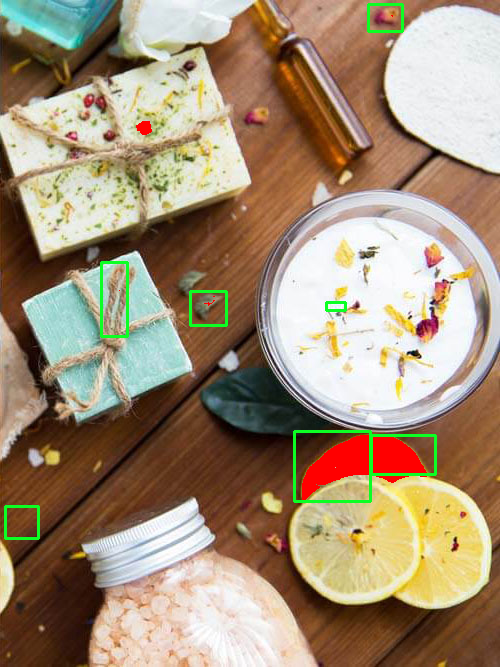

In [2]:

#to show the output into the output shell
from IPython.display import Image
Image(filename='diff_img1.png') # to show the difference in the first image

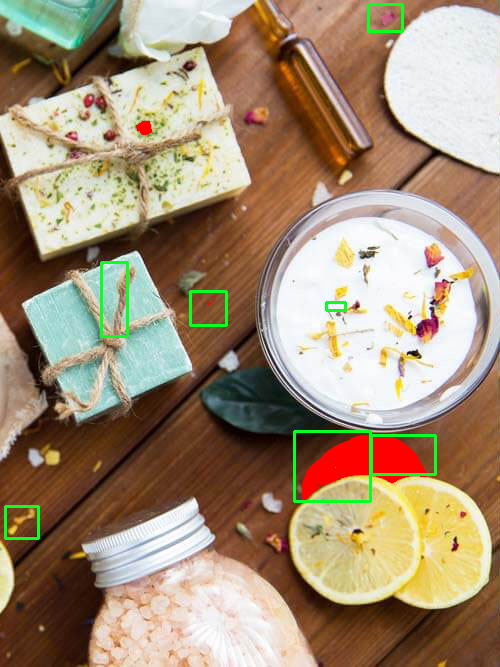

In [3]:
#to show the output into the output shell
from IPython.display import Image
Image(filename='diff_img2.png') # to show the difference in the second image